In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [42]:
df = pd.read_csv('/content/drive/MyDrive/dataset/capstone_dynamic/dynamic.csv', delimiter=',')
df2 = pd.read_csv('/content/drive/MyDrive/dataset/capstone_dynamic/dynamic.csv', delimiter=',').sample(500, random_state=42)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   week         5000 non-null   int64  
 1   enter_hour   5000 non-null   float64
 2   spent_hours  5000 non-null   float64
 3   fee          5000 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 156.4 KB


In [44]:
features = ['week', 'enter_hour', 'spent_hours', 'fee']

In [45]:
df.sample(5)

,week,enter_hour,spent_hours,fee
3348,1,0.456559,0.073722,0.206421
109,0,0.262627,0.326741,0.653482
2859,1,0.475207,0.372206,1.042178
465,0,0.007326,0.574026,0.918441
1017,0,0.538258,0.562129,1.349109


In [46]:
df[features].describe()

,week,enter_hour,spent_hours,fee
count,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.502800,0.359599,0.359708,0.830079
std,0.500042,0.205740,0.208280,0.510362
min,0.000000,0.001303,0.001155,0.002309
25%,0.000000,0.183546,0.179598,0.402514
50%,1.000000,0.359220,0.358368,0.800847
75%,1.000000,0.537034,0.536915,1.226530
max,1.000000,0.719979,0.719534,2.014041


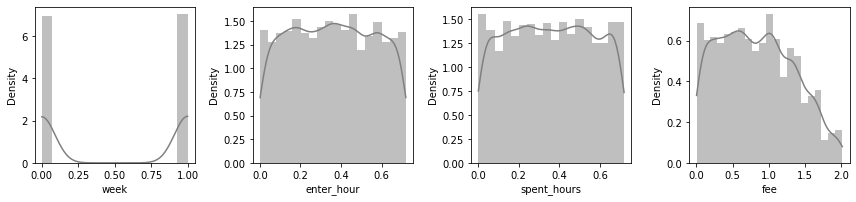

In [38]:
plt.figure(figsize=(12, 8))
for i in range(0, len(features)):
    plt.subplot(3, len(features), i+1)
    sns.histplot(df[features[i]], color='gray', kde=True, stat="density", linewidth=0)
    plt.tight_layout()

In [36]:
max_enter_hour = df['enter_hour'].max()
min_enter_hour = df['enter_hour'].min()
# std formula for unirform distribution
exp = ((max_enter_hour - min_enter_hour)**2)/12
math.sqrt(exp)

0.20746372790699172

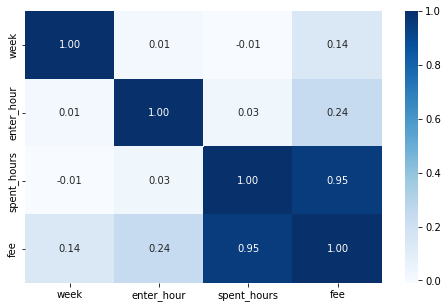

In [37]:
plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

In [31]:
x = df2[features]
y = df2['fee'].values

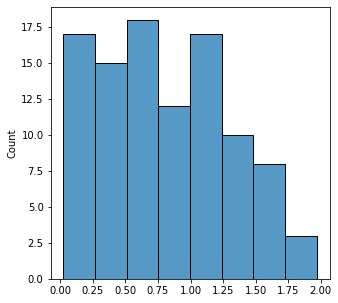

In [32]:
plt.figure(figsize=(5,5))
plt.tight_layout()
sns.histplot(y)

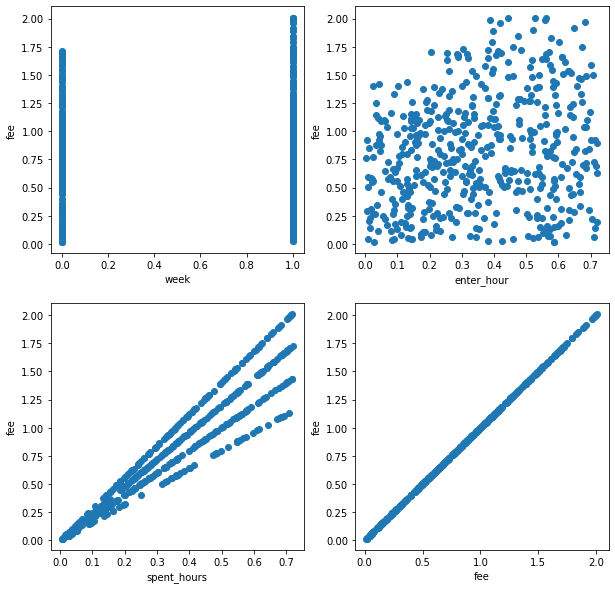

In [39]:
plt.figure(figsize=(10, 10))
for i, feature in enumerate(df2[features]):
  plt.subplot(2,2,i+1)
  plt.scatter(df2[feature], df2['fee'])
  plt.ylabel('fee', size=10)
  plt.xlabel(feature, size=10)

Text(0.5, 0, 'spent_hours')

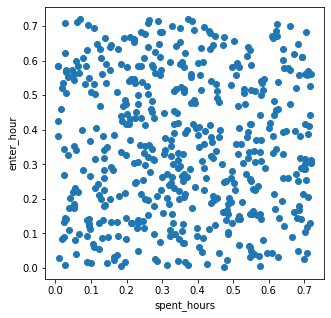

In [40]:
plt.figure(figsize=(5, 5))
plt.scatter(df2['spent_hours'], df2['enter_hour'])
plt.ylabel('enter_hour', size=10)
plt.xlabel('spent_hours', size=10)

In [16]:
df1 = df[df.spent_hours > 0.7].sample(1)
spent = df1.spent_hours
(spent - spent*0.2)*2

3628    1.134976
Name: spent_hours, dtype: float64

In [41]:
px.scatter_3d(df2, x='enter_hour', y='spent_hours', z='fee', opacity=0.5)